In [120]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [134]:
# récupération du chemin d'accès de la typo et récupération de celle-ci dans la variable prop
fpath = os.path.join(mpl.get_data_path(), r'C:\Users\omira\Downloads\Optima Medium.ttf')
prop = fm.FontProperties(fname=fpath)

text_kwargs = dict(ha='center', va='center', fontsize=14, color='white')

# importation du thème seaborn
sns.set_theme(context='notebook', style='darkgrid', palette='dark', font_scale=1, color_codes=True, rc=None)
sns.set(font=prop.get_name())
# upgrade de la résolution des visualisations
plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 200

# set dark background
plt.style.use("dark_background")

In [99]:
df = pd.read_csv('C:/Users/omira/Desktop/Anticipate-Energy-Needs/buildings_cleaned.csv')

In [100]:
y = df['Electricity(kWh)']
X = df.drop(columns=['Electricity(kWh)'])

In [16]:
X

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofFloors,PropertyGFATotal,NumberofBuildings,SiteEUI(kBtu/sf),SiteEnergyUse(kBtu),NaturalGas(therms),TotalGHGEmissions,ENERGYSTARScore
0,NonResidential,Hotel,1927,12,88434,1.0,81.699997,7.226362e+06,12764.529300,249.98,60.000
1,NonResidential,Hotel,1996,11,103566,1.0,94.800003,8.387933e+06,51450.816410,295.86,61.000
2,NonResidential,Hotel,1926,10,61320,1.0,110.800003,6.794584e+06,18112.130860,286.43,56.000
3,NonResidential,Hotel,1980,18,175580,1.0,114.800003,1.417261e+07,88039.984380,505.01,75.000
4,Nonresidential COS,Other,1999,2,97288,1.0,136.100006,1.208662e+07,47151.816410,301.81,59.625
...,...,...,...,...,...,...,...,...,...,...,...
3336,Nonresidential COS,Office,1990,1,12294,1.0,69.099998,8.497457e+05,3254.750244,20.94,46.000
3337,Nonresidential COS,Other,2004,1,16000,1.0,59.400002,9.502762e+05,5537.299805,32.17,82.250
3338,Nonresidential COS,Other,1974,1,13157,1.0,438.200012,5.765898e+06,39737.390630,223.54,78.750
3339,Nonresidential COS,Mixed Use Property,1989,1,14101,1.0,51.000000,7.194712e+05,3706.010010,22.11,81.750


In [101]:
X = pd.get_dummies(X)

In [102]:
X['ENERGYSTARScore'] = np.log(X['ENERGYSTARScore'])

In [105]:
# Division des données en un ensemble d'entraînement et un ensemble de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [106]:
# Création de l'objet de régression linéaire
model = LinearRegression()

# Entraînement du modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

LinearRegression()

In [155]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de la MSE et R²
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)

# Affichage des résultats
print('MSE:', mse_linear)
print('R²:', r2_linear)

MSE: 16033720841.685694
R²: 0.9958846923040273


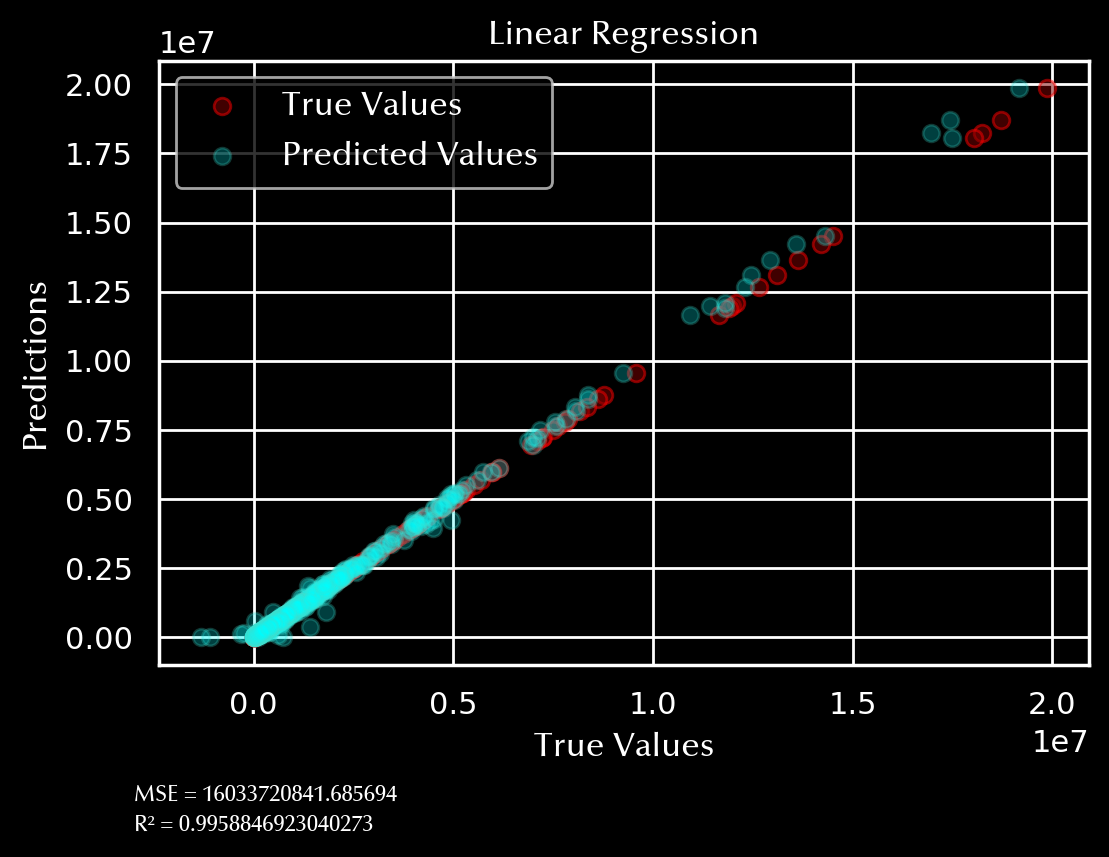

In [156]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Linear Regression', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_linear), fontproperties=prop, size=8)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_linear), fontproperties=prop, size=8)
plt.show()

In [157]:
#Regression Tree

# Initialisation du modèle de régression par arbre de décision
regressor = DecisionTreeRegressor(random_state=42)

# Entraînement du modèle sur le jeu d'entraînement
regressor.fit(X_train, y_train)

# Prédiction sur le jeu de test
y_pred = regressor.predict(X_test)

# Évaluation du modèle sur le jeu de test
mse_tree = mean_squared_error(y_test, y_pred)
r2_tree = r2_score(y_test, y_pred)
print("Score R²: ", r2_tree)
print("MSE: ", mse_tree)

Score R²:  0.9052447679596958
MSE:  369177483450.43524


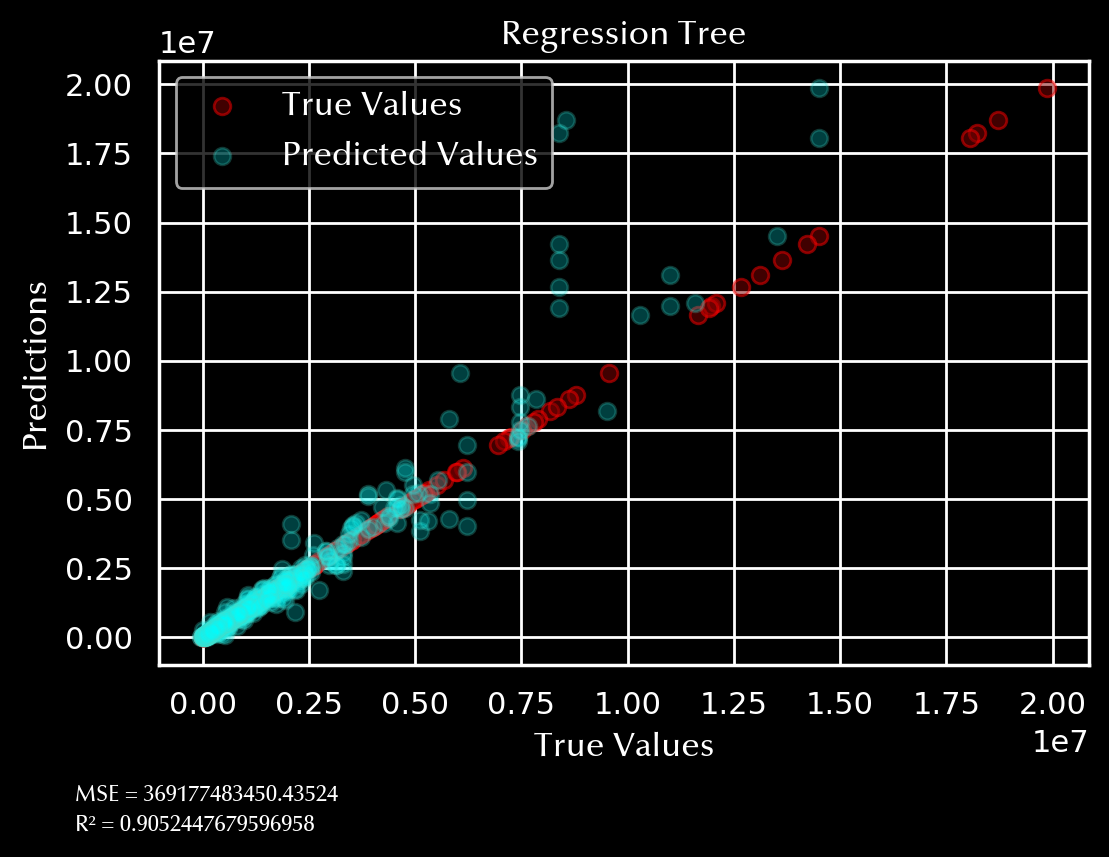

In [158]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Regression Tree', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_tree), fontproperties=prop, size=8)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_tree), fontproperties=prop, size=8)
plt.show()

In [88]:
mse > mse_tree

False

In [89]:
r2 > score

True

In [159]:
#Gradient Boosting

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42)

# Entraîner le modèle
gbr.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = gbr.predict(X_test)

# Calculer le score MSE et R2
mse_gradient = mean_squared_error(y_test, y_pred)
r2_gradient = r2_score(y_test, y_pred)
print("Score MSE: ", mse_gradient)
print("R²: ", r2_gradient)

Score MSE:  239152324123.25107
R²:  0.9386177787619079


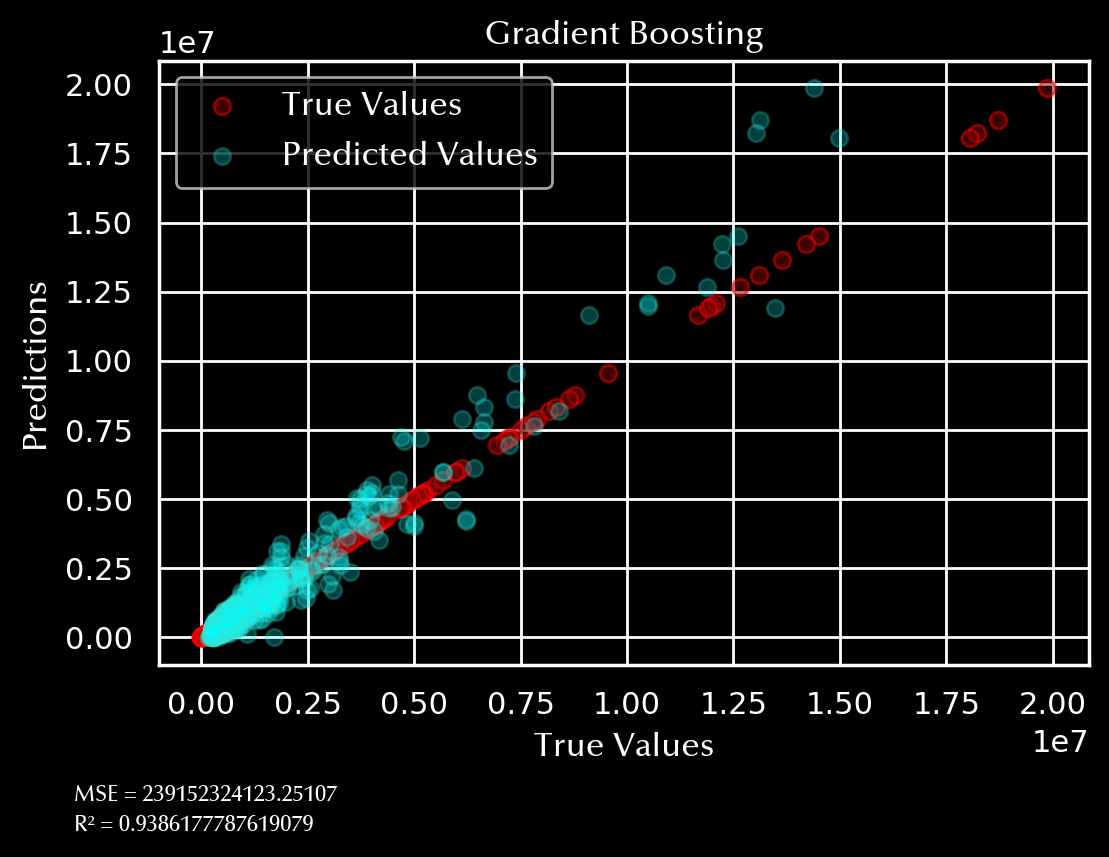

In [160]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Gradient Boosting', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_gradient), fontproperties=prop, size=8)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_gradient), fontproperties=prop, size=8)
plt.show()

In [99]:
mse_gradient > mse_linear

True

In [162]:
# Random Forest

# Instanciation et entraînement du modèle RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = rf.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_random_forest = mean_squared_error(y_test, y_pred)
r2_random_forest = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse_random_forest)
print("R²: %.2f" % r2_random_forest)

MSE: 172563896698.74
R²: 0.96


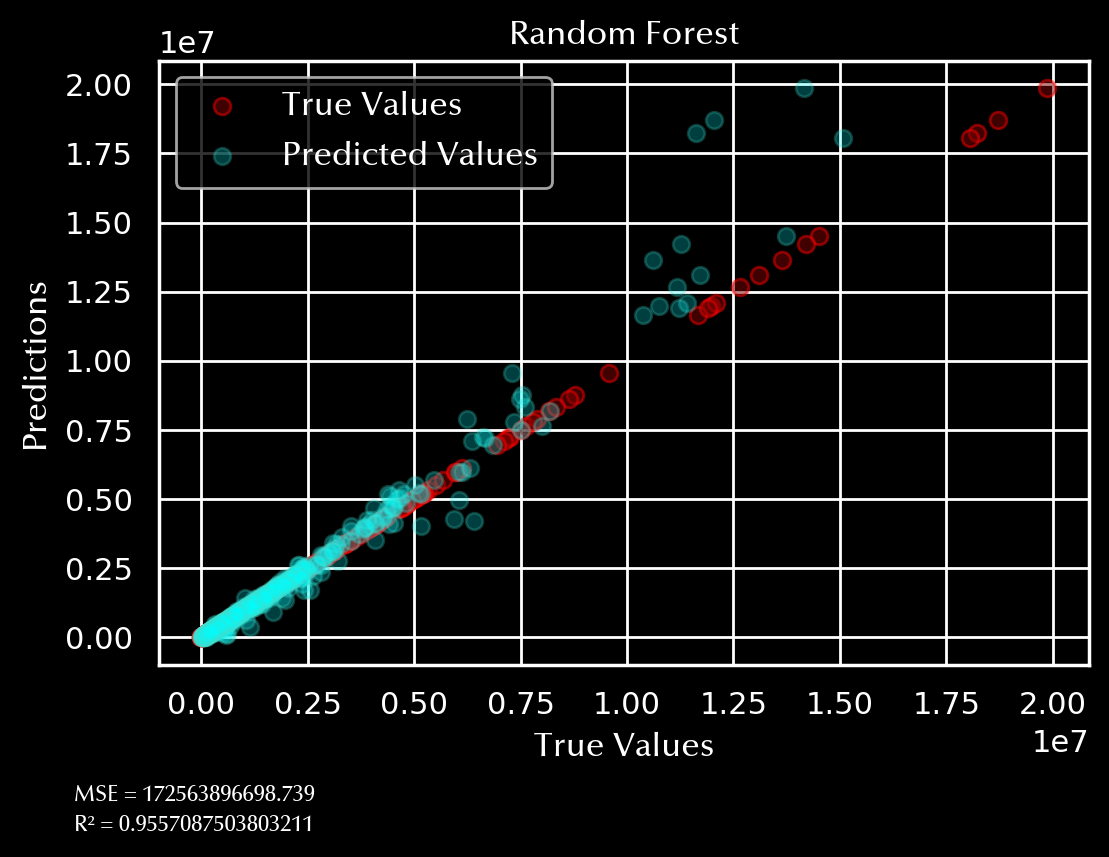

In [151]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('Random Forest', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_random_forest), fontproperties=prop, size=8)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_random_forest), fontproperties=prop, size=8)
plt.show()

In [153]:
# Instanciation et entraînement du modèle XGBRegressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = xgb.predict(X_test)

# Calcul de la performance du modèle en utilisant l'erreur quadratique moyenne (MSE)
mse_xgboost = mean_squared_error(y_test, y_pred)
r2_xgboost = r2_score(y_test, y_pred)
print("MSE: %.2f" % mse_xgboost)
print("R2: %.2f" % r2_xgboost)

MSE: 135908053134.84
R2: 0.97


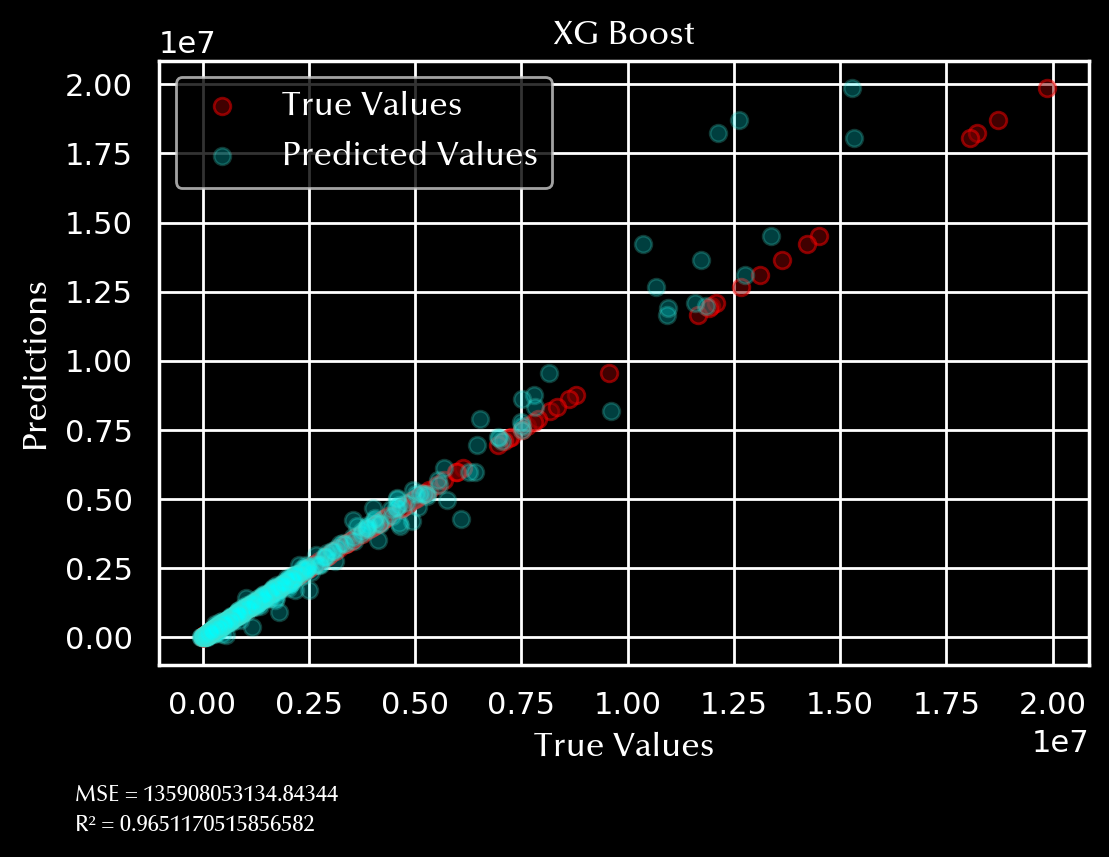

In [154]:
sns.scatterplot(y=y_test, x=y_test, color='maroon', label='True Values', alpha=0.5, edgecolor='red', linewidth=1)
sns.scatterplot(y=y_test, x=y_pred, color='aqua', label='Predicted Values', alpha=0.25, edgecolor='turquoise', linewidth=1)
plt.xlabel('True Values', fontproperties=prop)
plt.ylabel('Predictions', fontproperties=prop)
plt.title('XG Boost', fontproperties=prop)
plt.legend(loc='best', prop=prop)
plt.text(-3000000, -5900000, 'MSE = {}'.format(mse_xgboost), fontproperties=prop, size=8)
plt.text(-3000000, -7000000, 'R² = {}'.format(r2_xgboost), fontproperties=prop, size=8)
plt.show()

In [123]:
from plotly.offline import iplot, init_notebook_mode; init_notebook_mode(connected=True)

In [128]:
data = [
    {'r': r2_linear, 'theta': 'LinearRegression'},
    {'r': r2_tree, 'theta': 'DecisionTreeRegressor'},
    {'r': r2_random_forest, 'theta': 'RandomForest'},
    {'r': r2_gradient, 'theta': 'GradientBoost'},
    {'r': r2_xgboost, 'theta': 'XGBoost'}
]

df = pd.DataFrame.from_records(data)
fig = px.line_polar(df, r='r', theta='theta',title="Score R2 pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['limegreen'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,1], # plage maximale de l'axe radial
            showticklabels=False
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

In [129]:
df = pd.DataFrame(dict(
    r=[mse_linear/10e9, mse_tree/10e9, mse_random_forest/10e9, mse_gradient/10e9, mse_xgboost/10e9],
    theta=['LinearRegression','DecisionTreeRegressor','RandomForest',
           'GradientBoost', 'XGBoost']))
fig = px.line_polar(df, r='r', theta='theta',title="Score MSE pour les algorithmes", line_close=True, template='plotly_dark', color_discrete_sequence=['limegreen'])
fig.update_traces(fill='toself')
# change la police
fig.update_layout(
    font=dict(
        family="Optima",
        size=12,
        color="white"
    )
)
# Masquer la ligne représentant les valeurs de 0 à 5 sur l'axe radial
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            showline=False, # masquer la ligne sur l'axe radial
            range=[0,50], # plage maximale de l'axe radial
            showticklabels=True
        )
    )
)

fig.update_layout(
    polar=dict(
        radialaxis=dict(gridcolor='gray', linecolor='gray'),
        angularaxis=dict(gridcolor='gray', linecolor='gray')
    )
)
fig.show()

In [46]:
# 3. GridSeachCV -> Utilise pour trouver les meilleurs hyperpramètres du modèle

model_linear = LinearRegression()
parameters = {'fit_intercept':[True, False], 'normalize':[True, False]}
grid_linear = GridSearchCV(model_linear, parameters, cv=3)

grid_linear.fit(X_train, y_train)

# sorted(grid_linear.cv_results_.keys())

best_model = grid_linear.best_estimator_

y_pred_lr_best_model = best_model.predict(X_test)
mse_linear_regression_best_model = mean_squared_error(y_test, y_pred_lr_best_model)

mse_linear_regression_best_model > mse_linear

C:\Users\omira\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)



C:\Users\omira\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline

False

In [130]:
model_linear = LinearRegression()
parameters = {'fit_intercept':[False, False]}
grid_linear = GridSearchCV(model_linear, parameters, cv=3)

grid_linear.fit(X_train, y_train)

sorted(grid_linear.cv_results_.keys())

best_model = grid_linear.best_estimator_

y_pred_lr_best_model = best_model.predict(X_test)
mse_linear_two = mean_squared_error(y_test, y_pred_lr_best_model)

mse_linear_two

15971884543.327257

In [43]:
mse_linear_two

15971884543.327257

In [44]:
mse_linear_one

15971884543.327257

In [45]:
mse_linear_regression_best_model

15971884543.327257

In [47]:
mse_linear

16033720841.685694